In [2]:
import os
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [58]:
def load_images_to_dataframe(dataset_dir, target_size=(48, 48)):
    data = []
    labels = []

    for label in os.listdir(dataset_dir):
        class_dir = os.path.join(dataset_dir, label)
        if os.path.isdir(class_dir):
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                try:
                    # Load gambar dan ubah ukuran
                    img = load_img(img_path, target_size=target_size, color_mode="grayscale")
                    img_array = img_to_array(img) / 255.0  # Normalisasi nilai pixel
                    
                    # Cek apakah gambar hitam sepenuhnya
                    if np.all(img_array == 0):
                        print(f"Menghapus gambar hitam: {img_path}")
                        continue  # Lewati gambar hitam
                    
                    data.append(img_array)
                    labels.append(label)
                except Exception as e:
                    print(f"Error loading {img_path}: {e}")
    
    # Konversi ke DataFrame
    df = pd.DataFrame({
        "image": data,
        "label": labels
    })
    return df


In [59]:
test = r"E:\AI_Projek\a\FER-2013\test"
train = r"E:\AI_Projek\a\FER-2013\train"
df_tr = load_images_to_dataframe(train)
df_te = load_images_to_dataframe(test)

Menghapus gambar hitam: E:\AI_Projek\a\FER-2013\train\angry\Training_10131352.jpg
Menghapus gambar hitam: E:\AI_Projek\a\FER-2013\train\angry\Training_28756096.jpg
Menghapus gambar hitam: E:\AI_Projek\a\FER-2013\train\angry\Training_32571770.jpg
Menghapus gambar hitam: E:\AI_Projek\a\FER-2013\train\angry\Training_52563817.jpg
Menghapus gambar hitam: E:\AI_Projek\a\FER-2013\train\angry\Training_78540321.jpg
Menghapus gambar hitam: E:\AI_Projek\a\FER-2013\train\angry\Training_96772745.jpg
Menghapus gambar hitam: E:\AI_Projek\a\FER-2013\train\angry\Training_99531165.jpg
Menghapus gambar hitam: E:\AI_Projek\a\FER-2013\train\happy\Training_87607167.jpg
Menghapus gambar hitam: E:\AI_Projek\a\FER-2013\train\neutral\Training_89335926.jpg
Menghapus gambar hitam: E:\AI_Projek\a\FER-2013\train\sad\Training_48621797.jpg
Menghapus gambar hitam: E:\AI_Projek\a\FER-2013\train\surprise\Training_48403842.jpg
Menghapus gambar hitam: E:\AI_Projek\a\FER-2013\test\angry\PublicTest_5543497.jpg


In [10]:
c = df_tr['label'].unique()
c

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [60]:
label_map = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}

df_tr['label'] = df_tr['label'].map(label_map)
df_te['label'] = df_te['label'].map(label_map)


In [15]:
df_tr.head()

,image,label
0,"[[[0.19607843137254902], [0.15294117647058825]...",0
1,"[[[0.11372549019607843], [0.10196078431372549]...",0
2,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",0
3,"[[[0.6078431372549019], [0.5647058823529412], ...",0
4,"[[[0.8274509803921568], [0.8352941176470589], ...",0


In [61]:
import matplotlib.pyplot as plt

In [62]:
import matplotlib.pyplot as plt

def plot_sample_images(df, num_samples=5):
    """
    Plot beberapa sampel gambar dari DataFrame.
    
    Args:
    - df: DataFrame dengan kolom "image" (numpy array) dan "label".
    - num_samples: Jumlah gambar yang ingin diplot.
    """
    plt.figure(figsize=(10, 5))  # Ukuran plot
    for i in range(min(num_samples, len(df))):  # Pastikan tidak melebihi jumlah gambar
        image = df.iloc[i]["image"]  # Ambil gambar
        label = df.iloc[i]["label"]  # Ambil label
        plt.subplot(1, num_samples, i + 1)  # Subplot grid
        plt.imshow(image.squeeze(), cmap="gray")  # Squeeze untuk gambar grayscale
        plt.title(label)
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()

# Contoh penggunaan
# plot_sample_images(df, num_samples=5)


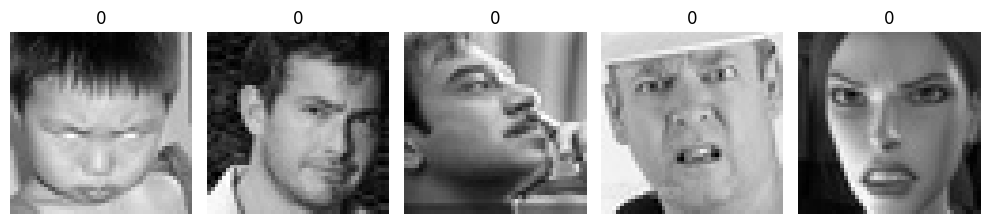

In [63]:
k = plot_sample_images(df_tr)

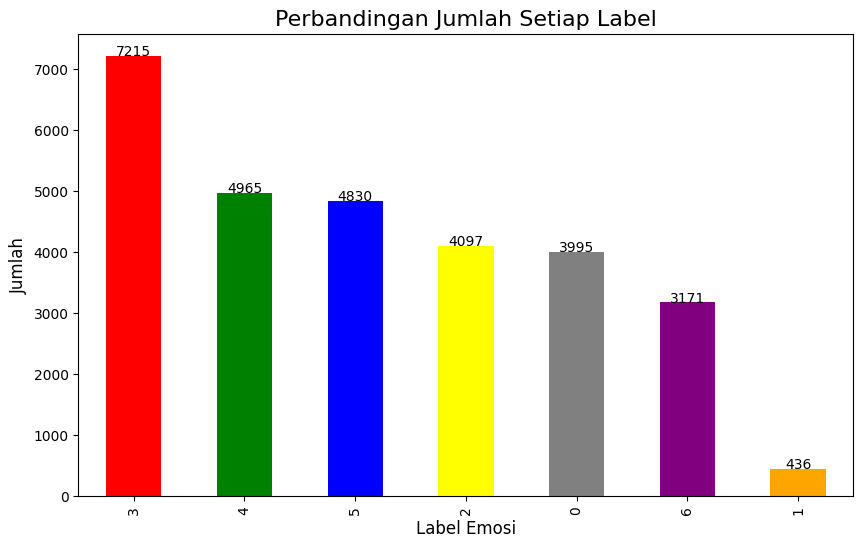

In [7]:
label_counts = df_tr['label'].value_counts()

# Membuat visualisasi bar chart
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color=['red', 'green', 'blue', 'yellow', 'gray', 'purple', 'orange'])

# Menambahkan judul dan label
plt.title("Perbandingan Jumlah Setiap Label", fontsize=16)
plt.xlabel("Label Emosi", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)

# Menampilkan nilai di atas setiap bar
for i, v in enumerate(label_counts):
    plt.text(i, v + 5, str(v), ha='center', fontsize=10)

# Menampilkan grafik
plt.show()

In [8]:
# 1. Hapus data dengan label 6
df_tr = df_tr[df_tr['label'] != 1]

# 2. Lakukan undersampling pada label 3, 4, 5, dan 2
# Tentukan jumlah yang diinginkan untuk setiap label (3995 data per kelas)
desired_count = 3171

# Membagi dataset berdasarkan label
df_tr_label_0 = df_tr[df_tr['label'] == 0]
df_tr_label_1 = df_tr[df_tr['label'] == 6]
df_tr_label_2 = df_tr[df_tr['label'] == 2]
df_tr_label_3 = df_tr[df_tr['label'] == 3]
df_tr_label_4 = df_tr[df_tr['label'] == 4]
df_tr_label_5 = df_tr[df_tr['label'] == 5]

# Lakukan undersampling pada label 2, 3, 4, dan 5
df_tr_label_2 = df_tr_label_2.sample(n=desired_count, random_state=42)
df_tr_label_3 = df_tr_label_3.sample(n=desired_count, random_state=42)
df_tr_label_4 = df_tr_label_4.sample(n=desired_count, random_state=42)
df_tr_label_5 = df_tr_label_5.sample(n=desired_count, random_state=42)
df_tr_label_0 = df_tr_label_0.sample(n=desired_count, random_state=42)

# 3. Gabungkan kembali dataset setelah undersampling dan penghapusan label 6
df_tr_resampled = pd.concat([df_tr_label_0, df_tr_label_1, df_tr_label_2, df_tr_label_3, df_tr_label_4, df_tr_label_5])

# 4. Melihat jumlah data untuk setiap label setelah pemrosesan
print(df_tr_resampled['label'].value_counts())

df_tr = df_tr_resampled

label
0    3171
6    3171
2    3171
3    3171
4    3171
5    3171
Name: count, dtype: int64


In [64]:
X_tr = np.stack(df_tr['image'].values)  # Konversi daftar array gambar ke numpy array
y_tr = to_categorical(df_tr['label'].values) 

In [65]:
model = Sequential([
    Conv2D(18, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(y_tr.shape[1], activation='softmax')  # Jumlah kelas sebagai output
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
pred = model.fit(X_tr, y_tr, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.3208 - loss: 1.6098 - val_accuracy: 5.2265e-04 - val_loss: 6.8760
Epoch 2/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.4779 - loss: 1.3385 - val_accuracy: 0.0206 - val_loss: 7.5010
Epoch 3/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.5212 - loss: 1.2394 - val_accuracy: 0.0047 - val_loss: 7.9531
Epoch 4/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.5418 - loss: 1.1777 - val_accuracy: 0.0190 - val_loss: 9.1614
Epoch 5/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5670 - loss: 1.1148 - val_accuracy: 0.0592 - val_loss: 9.4052
Epoch 6/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5881 - loss: 1.0646 - val_accuracy: 0.0664 - val_loss: 7.0922
Epoch 7/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.6091 - loss: 1.0095 - val_accuracy: 0.0535 - val_loss: 10.5455
Epoch 8/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6256 - loss: 0.97

In [24]:
df_te = df_te[df_te['label'] != 1]

In [67]:
X_te = np.stack(df_te['image'].values)  # Konversi daftar array gambar ke numpy array
y_te = to_categorical(df_te['label'].values)

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
y_pred = model.predict(X_te)
y_pred_binary = (y_pred > 0.5).astype(int) 

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [70]:
accuracy = accuracy_score(y_te, y_pred_binary)
print(f"Akurasi pada data test: {accuracy * 100:.2f}%")

Akurasi pada data test: 40.49%


In [13]:
from sklearn.metrics import f1_score, classification_report

In [59]:
f1 = f1_score(y_te, y_pred, average='binary')  # Untuk binary classification
print(f"F1-score: {f1:.2f}")

# Jika multiclass, gunakan average='weighted' atau 'macro'
# f1 = f1_score(y_true, y_pred, average='weighted')

# Print laporan lengkap
print("\nClassification Report:")
print(classification_report(y_te, y_pred))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [71]:
loss, accuracy = model.evaluate(X_te, y_te)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5435 - loss: 1.5536
Test Loss: 4.5971, Test Accuracy: 0.4672


In [86]:
# Load image
image_path = "FotoKu/happy/WIN_20241129_08_30_52_Pro.jpg"
image = load_img(image_path, target_size=(48, 48), color_mode="grayscale")
image_array = img_to_array(image)

# Konversi ke tiga saluran
image_array = cv2.cvtColor(image_array.astype('uint8'), cv2.COLOR_GRAY2RGB)

# Normalisasi dan tambahkan dimensi batch
image_array = image_array / 255.0
image_array = np.expand_dims(image_array, axis=0)

In [87]:
prediction = model.predict(image_array)

predicted_class = np.argmax(prediction)
confidence = np.max(prediction)
print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted class: 5
Confidence: 0.51


In [88]:
label_map_r = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}
predicted_label = label_map_r[predicted_class]
print(f"Predicted label: {predicted_label}")

Predicted label: sad


In [89]:
model.save('deteksi_wajah2.h5')

In [ ]:
image = load_img(image_path, target_size=(64, 64))  # Sesuaikan ukuran input model Anda
image_array = img_to_array(image)
image_array = image_array / 255.0  # Normalisasi ke rentang [0, 1]
image_array = np.expand_dims(image_array, axis=0) 

In [39]:
prediction = model.predict(X_rl)
predicted_class = np.argmax(prediction)
confidence = np.max(prediction)
print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted class: 20
Confidence: 0.99


In [42]:
print(prediction)

[[1.3814220e-04 2.0407239e-02 6.4074022e-01 3.1901925e-07 2.4471141e-03
  3.8363163e-03 3.3243066e-01]
 [5.6798177e-07 1.4034248e-03 9.6302062e-02 2.2288263e-05 2.0224306e-04
  2.9030885e-04 9.0177912e-01]
 [5.7334669e-06 2.1410058e-04 5.7044546e-03 4.1212547e-07 1.0796649e-05
  3.1238964e-05 9.9403328e-01]]
